## [KMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.KMNIST('./data', download=True)

100%|██████████| 18165135/18165135 [00:09<00:00, 2013895.21it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 374401.22it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:02<00:00, 1450810.15it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 23546969.82it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.KMNIST'>


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

L 28 28


In [9]:
print(type(target))

<class 'int'>


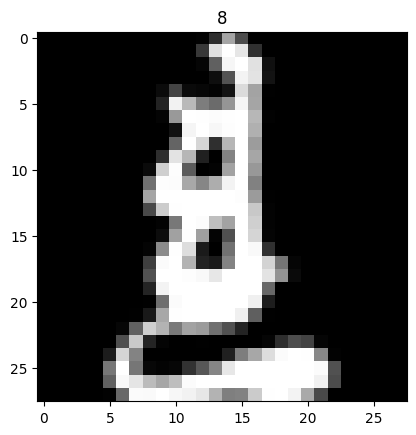

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.KMNIST('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


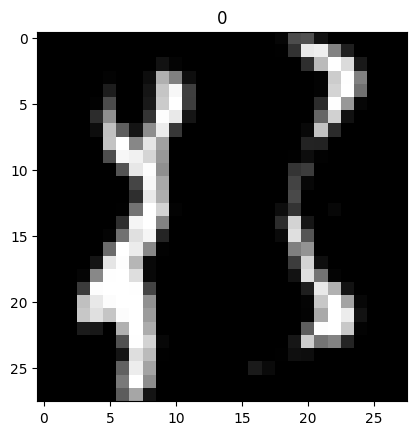

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


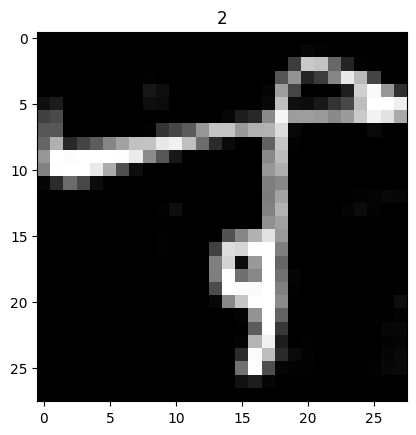

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [76]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [77]:
print(is_cuda, device)

True cuda


In [78]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.KMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.KMNIST(root='./data/', train=False, transform=compose, download=True)

In [79]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [80]:
train_batch_size = 64
test_batch_size = 128

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=train_batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=test_batch_size,
                                          shuffle=True)

In [81]:
class KMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(KMNISTModel, self).__init__() # (n, 1, 28, 28)
        self.cv = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # 1 = input channel size(gray), 3 = output(filter) volume size (n, 8, 26, 26)
                                              # padding = 0, stride = (1, 1)
                nn.ReLU(),
                nn.MaxPool2d(2),
                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # (n, 10, 10, 10)
                nn.ReLU(),
                nn.MaxPool2d(2) # (n, 10, 5, 5)
        )

        self.fc = nn.Sequential(nn.Linear(64 * 7 * 7, 128),
                                nn.ReLU(),
                                nn.Linear(128, 10)
              )        
        
    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 64*7*7)
        output = self.fc(x)
        with torch.no_grad():
            value = torch.max(output, 1)[1]
        return output, value

In [82]:
model = KMNISTModel(10).to(device)

In [83]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([64, 1, 28, 28])
tensor([[-0.0372, -0.0330,  0.0758, -0.0103,  0.0439,  0.0294,  0.0643, -0.0661,
          0.0550,  0.0292],
        [-0.0451, -0.0462,  0.0776, -0.0074,  0.0222,  0.0324,  0.0296, -0.0507,
          0.0523,  0.0262],
        [-0.0701, -0.0364,  0.0975, -0.0306,  0.0544,  0.0342,  0.0283, -0.0199,
          0.0343,  0.0375],
        [-0.0721, -0.0181,  0.0941, -0.0233,  0.0306,  0.0277,  0.0526, -0.0148,
          0.0436,  0.0571],
        [-0.0579, -0.0305,  0.0924, -0.0051,  0.0346,  0.0172,  0.0459, -0.0427,
          0.0626,  0.0305],
        [-0.0659, -0.0273,  0.0933, -0.0239,  0.0495,  0.0067,  0.0444, -0.0236,
          0.0361,  0.0191],
        [-0.0475, -0.0114,  0.0899, -0.0076,  0.0325,  0.0026,  0.0561, -0.0423,
          0.0513,  0.0490],
        [-0.0629, -0.0303,  0.0882, -0.0332,  0.0251,  0.0185,  0.0420, -0.0209,
          0.0211,  0.0429],
        [-0.0631, -0.0232,  0.0666, -0.0076,  0.0351,  0.0326,  0.0448, -0.0225,
          0.0515,  

In [84]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
model = KMNISTModel(10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

for epoch in range(n_epochs):
    total_loss = 0
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        y, _ = model(data)
        del data
        loss = criterion(y, target)
        del target
        total_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('epoch {}th loss: {}'.format(epoch, total_loss / 60))

In [85]:
model = KMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        del train_target
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1

    model.eval()
    n_test = 0
    test_loss = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, _ = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1

    print('epoch {}th training loss: {} test loss: {}'.format(epoch, train_loss / n_train, test_loss / n_test))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 0.9595717658599218 test loss: 0.9418405711650848
epoch 1th training loss: 0.39121870696544647 test loss: 0.6147783756256103
epoch 2th training loss: 0.22244529152909914 test loss: 0.47222557067871096
epoch 3th training loss: 0.15807732604444028 test loss: 0.4019624590873718
epoch 4th training loss: 0.1249186818798383 test loss: 0.3415882259607315
epoch 5th training loss: 0.10190890928109488 test loss: 0.34684493243694303
epoch 6th training loss: 0.08444224279373884 test loss: 0.3022144943475723
epoch 7th training loss: 0.07181266434490681 test loss: 0.2916642501950264
epoch 8th training loss: 0.06012738477438688 test loss: 0.25449631214141843
epoch 9th training loss: 0.05095575898885727 test loss: 0.2570182293653488


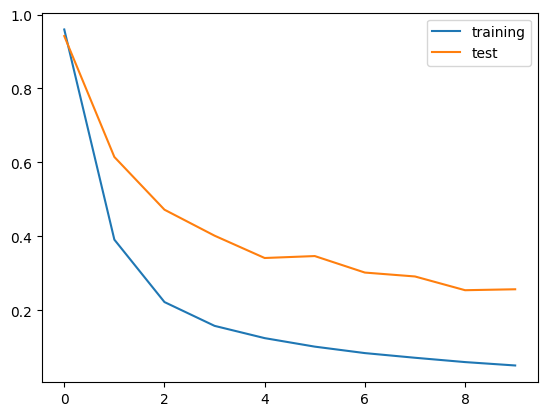

In [86]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.931
